In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


KeyboardInterrupt: 

In [25]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dense(units = 1, activation = 'sigmoid'))


In [26]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [27]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [28]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Users/RONALDDesktop/IMS-Classroom/Python Code/CR-Deep Learning/Nike-Adidas/dataset/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32)

test_set = test_datagen.flow_from_directory('C:/Users/RONALDDesktop/IMS-Classroom/Python Code/CR-Deep Learning/Nike-Adidas/dataset/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32)


Found 100 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [29]:
training_set.class_indices

{'addidas': 0, 'nike': 1}

In [30]:
import warnings 
warnings.filterwarnings("ignore")

In [31]:
result=classifier.fit(training_set,
                         epochs=50,
                         validation_data = test_set)

Epoch 1/50
4/4 [==============================] - 1s 345ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/50
4/4 [==============================] - 1s 162ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/50
4/4 [==============================] - 1s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/50
4/4 [==============================] - 1s 166ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/50
4/4 [==============================] - 1s 223ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/50
4/4 [==============================] - 1s 194ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/50
4/4 [==============================] - 1s 160ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/50
4/4 [====

In [32]:
classifier.save('addi_nike_classifier.h5')

In [33]:
from  keras.models import load_model
from keras_preprocessing import image
import numpy as np
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline


In [34]:
model=load_model("addi_nike_classifier.h5")

In [35]:
def model_output (path):
    raw_img = image.load_img(path,target_size=(64,64))
    raw_img = image.img_to_array(raw_img)
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255
    prediction= model.predict_classes(raw_img)[0][0]
    Probability = model.predict(raw_img)[0][0]
    plt.imshow(cv2.imread(path))
    print('Probability',Probability)
    

In [36]:
import os
os.getcwd()

'C:\\Users\\USER\\Desktop\\Python Code\\TensorFlow\\CNN'

Probability 0.49846965


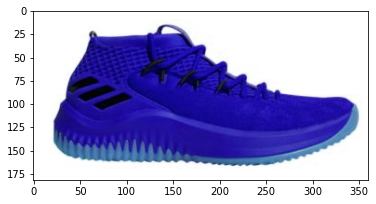

In [37]:
model_output("ADIDAS_29.png")

Probability 0.4994966


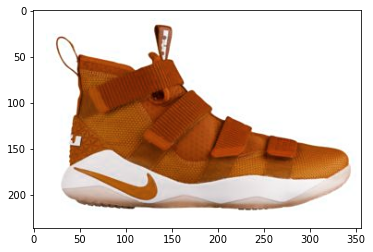

In [38]:
model_output("NIKE_53.png")